# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# تحديد شكل الإدخال لصورة من مجموعة بيانات CIFAR-10
input_shape = (32, 32, 3)

# بناء النموذج
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 فئات لـ CIFAR-10
])

# طباعة ملخص النموذج
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تحويل الفئات إلى One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# تطبيع البيانات إلى [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# تعريف النموذج
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 فئات لخروج CIFAR-10
])

# تجميع النموذج
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# تدريب النموذج
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))




Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1567 - loss: 2.2762 - val_accuracy: 0.2361 - val_loss: 2.1844
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2557 - loss: 2.1507 - val_accuracy: 0.2946 - val_loss: 2.0523
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2959 - loss: 2.0252 - val_accuracy: 0.3085 - val_loss: 1.9892
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3140 - loss: 1.9581 - val_accuracy: 0.3289 - val_loss: 1.9196
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3287 - loss: 1.9175 - val_accuracy: 0.3351 - val_loss: 1.8882
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3405 - loss: 1.8867 - val_accuracy: 0.3145 - val_loss: 1.8999
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3522 - loss: 1.8560 - val_accuracy: 0.3636 - val_loss: 1.8331
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3642 - loss: 1.8318 - val_accuracy: 0.3594 - v

*   Plot the cross entropy loss curve and the accuracy curve

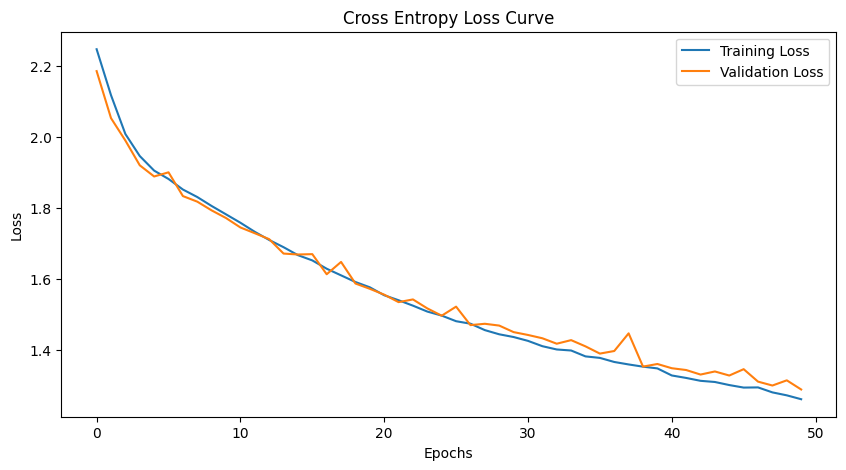

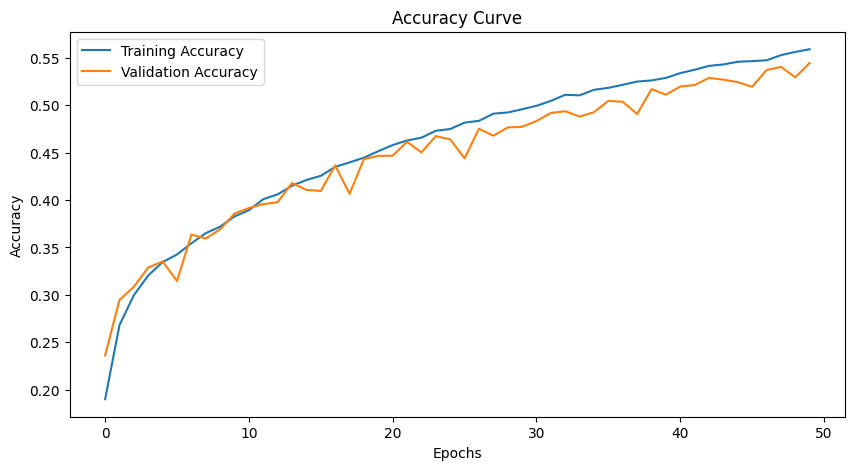

In [6]:
import matplotlib.pyplot as plt

# Plot the cross entropy loss curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.1514 - loss: 2.2726 - val_accuracy: 0.2248 - val_loss: 2.1747
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2397 - loss: 2.1320 - val_accuracy: 0.2786 - val_loss: 2.0131
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2884 - loss: 2.0085 - val_accuracy: 0.3335 - val_loss: 1.9205
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3268 - loss: 1.9218 - val_accuracy: 0.3466 - val_loss: 1.8670
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3477 - loss: 1.8715 - val_accuracy: 0.3556 - val_loss: 1.8532
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3679 - loss: 1.8116 - val_accuracy: 0.3712 - val_loss: 1.7930
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3804 - loss: 1.7735 - val_accuracy: 0.3870 - val_loss: 1.7447
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3938 - loss: 1.7390 - val_accuracy: 0.3980 - 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the VGG-like model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output and add Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.1319 - loss: 2.2866 - val_accuracy: 0.2062 - val_loss: 2.2037
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2374 - loss: 2.1643 - val_accuracy: 0.2524 - val_loss: 2.0769
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2803 - loss: 2.0401 - val_accuracy: 0.2656 - val_loss: 2.0443
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3050 - loss: 1.9694 - val_accuracy: 0.3360 - val_loss: 1.8836
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3361 - loss: 1.8911 - val_accuracy: 0.3593 - val_loss: 1.8414
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3563 - loss: 1.8334 - val_accuracy: 0.3658 - val_loss: 1.8236
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3715 - loss: 1.7976 - val_accuracy: 0.3843 - val_loss: 1.7649
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3832 - loss: 1.7614 - val_accuracy: 0.3713 - v

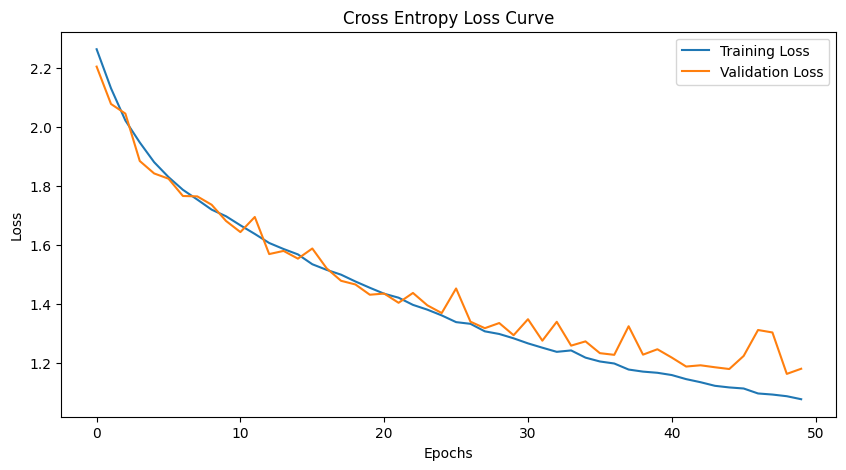

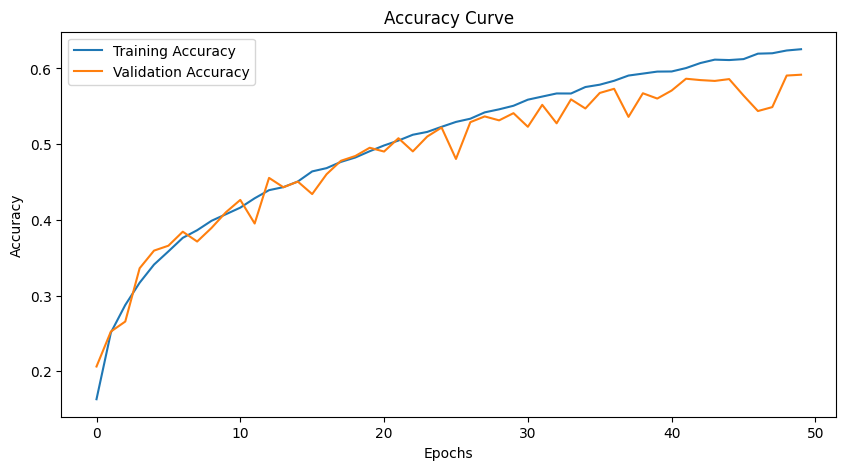

In [10]:
# Plot the loss curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


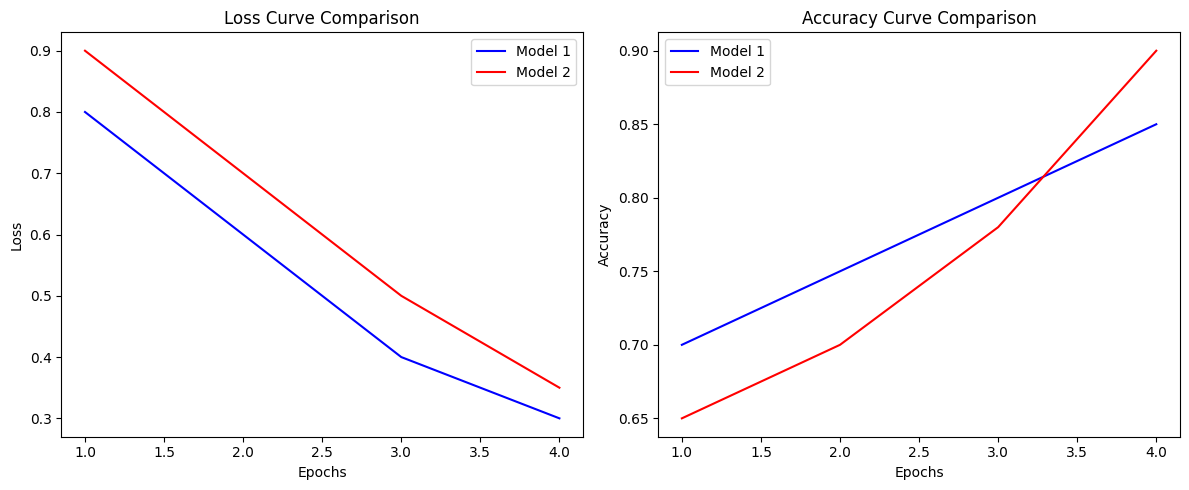

In [12]:
import matplotlib.pyplot as plt

# Example training history data (replace with your actual model history)
# Model 1 (shallow model) and Model 2 (deeper model)
history_model_1 = {
    'loss': [0.8, 0.6, 0.4, 0.3],  # example loss for model 1
    'accuracy': [0.7, 0.75, 0.8, 0.85]  # example accuracy for model 1
}

history_model_2 = {
    'loss': [0.9, 0.7, 0.5, 0.35],  # example loss for model 2
    'accuracy': [0.65, 0.7, 0.78, 0.9]  # example accuracy for model 2
}

epochs = [1, 2, 3, 4]

# Plotting Loss Curves
plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, history_model_1['loss'], label='Model 1', color='b')
plt.plot(epochs, history_model_2['loss'], label='Model 2', color='r')
plt.title('Loss Curve Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs, history_model_1['accuracy'], label='Model 1', color='b')
plt.plot(epochs, history_model_2['accuracy'], label='Model 2', color='r')
plt.title('Accuracy Curve Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()





**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 🔍 التأكد من أن بيانات x_test هي مصفوفة NumPy بالنوع الصحيح
x_test = np.array(x_test, dtype=np.float32) / 255.0

# ✦ التأكد من أن عدد القنوات صحيح (إذا كانت الصور رمادية)
if x_test.shape[-1] != 3:
    x_test = np.repeat(x_test, 3, axis=-1)  # تحويل الصور إلى 3 قنوات لونية

# ✦ التأكد من أن شكل x_test متوافق مع النموذج
print("Shape of x_test:", x_test.shape)
print("Expected input shape:", model.input_shape)

# 🧠 تنفيذ التنبؤ
y_pred = model.predict(x_test)

# ✦ تحويل القيم إلى تصنيفات رقمية
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 🎯 حساب مصفوفة الارتباك
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 🏷️ أسماء الفئات (CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 📊 رسم مصفوفة الارتباك
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 📝 طباعة تقرير التصنيف
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=class_names))




Shape of x_test: (10000, 64, 64, 3)
Expected input shape: (None, 32, 32, 3)


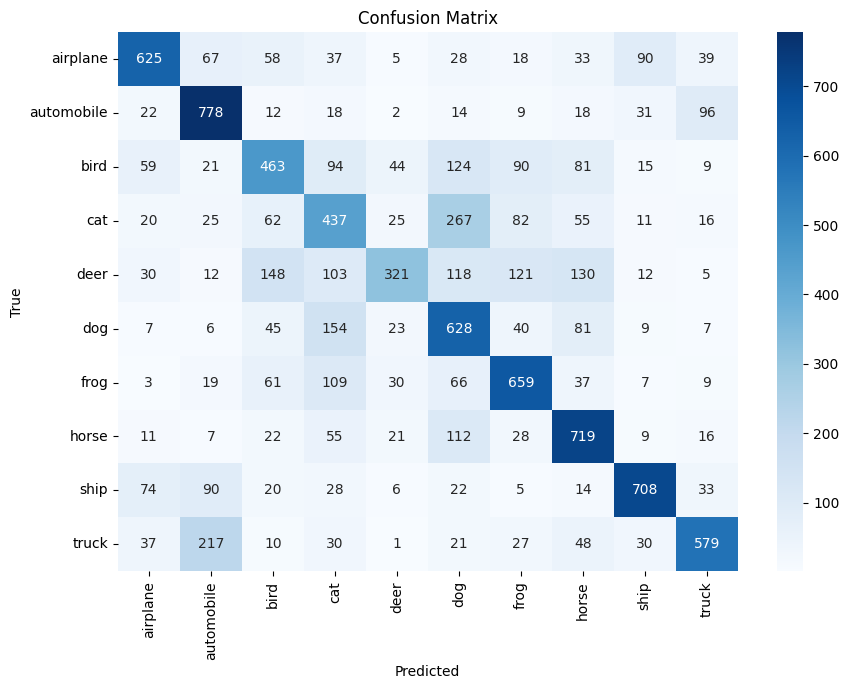

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 4ms/step - accuracy: 0.5917 - loss: 1.1791
Test Accuracy: 59.17%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [17]:
from keras.backend import clear_session
clear_session()

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the VGG-like model
def create_vgg_model(input_shape=(64, 64, 3), num_classes=10):
    model = models.Sequential()

    # First block: 2 Conv layers with 64 filters followed by MaxPooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second block: 2 Conv layers with 128 filters followed by MaxPooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third block: 2 Conv layers with 256 filters followed by MaxPooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
vgg_model = create_vgg_model()

# Compile the model
vgg_model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
vgg_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize images to 64x64 for the VGG model
x_train = tf.image.resize(x_train, (64, 64)) / 255.0
x_test = tf.image.resize(x_test, (64, 64)) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [19]:
# Compile the model
vgg_model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = vgg_model.fit(x_train, y_train,
                         validation_data=(x_test, y_test),
                         epochs=10,
                         batch_size=512)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 780ms/step - accuracy: 0.1030 - loss: 2.3008 - val_accuracy: 0.1140 - val_loss: 2.2958
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.1213 - loss: 2.2928 - val_accuracy: 0.1252 - val_loss: 2.2745
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.1633 - loss: 2.2546 - val_accuracy: 0.1737 - val_loss: 2.1609
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 368ms/step - accuracy: 0.2236 - loss: 2.1279 - val_accuracy: 0.2771 - val_loss: 2.0046
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 368ms/step - accuracy: 0.2722 - loss: 2.0334 - val_accuracy: 0.3038 - val_loss: 1.9683
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.3095 - loss: 1.9506 - val_accuracy: 0.3357 - val_loss: 1.8568
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.3267 - loss: 1.8957 - val_accuracy: 0.3514 - val_loss: 1.8360
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.3476 - loss: 1.8426 - val_acc

In [23]:
# Evaluate on test set
test_loss, test_acc = vgg_model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predict class labels
y_pred = np.argmax(vgg_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4003 - loss: 1.7225

Test Accuracy: 0.3990
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


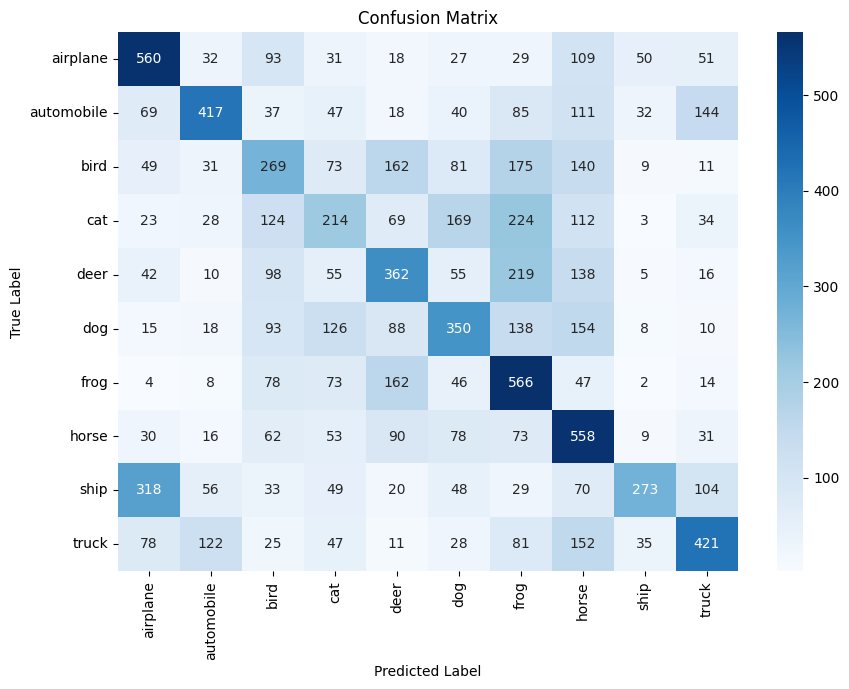

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity to neural networks, enabling them to learn complex patterns. Without activation functions, the network behaves like a linear regression model, limiting its ability to model real-world data effectively.

_

2 - Key Differences between sigmoid and softmax:

Function	Definition	Use Case	Output Range
Sigmoid	Converts values into a range between 0 and 1, representing probabilities	Used for binary classification (e.g., cat vs. dog)	(0,1)
Softmax	Converts values into a probability distribution across multiple classes	Used for multi-class classification (e.g., CIFAR-10)	Sum of outputs = 1


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Loss Function	Use Case	Explanation
Binary Crossentropy	Used for binary classification (2 classes)	Works with sigmoid activation and calculates loss based on two possible outputs (0 or 1)
Categorical Crossentropy	Used for multi-class classification (3 or more classes)	Works with softmax activation and calculates loss for multiple class probabilities
_
